### Create the machine learning algorithm

#### import the libraries

In [264]:
import numpy as np
import tensorflow as tf

In [265]:
tf.__version__

'2.12.0'

#### load the Data

In [266]:
npz = np.load('Audiobooks_data_train.npz')

train_inputs = npz['inputs'].astype(float)
train_targets = npz['targets'].astype(int)

npz = np.load('Audiobooks_data_validation.npz')

validation_inputs, validation_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

npz = np.load('Audiobooks_data_test.npz')

test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

### Model

#### Hyper-parameters

In [267]:
tf.random.set_seed(42)
HIDDEN_LAYER_SIZE = 256
INPUT_SIZE = 10
OUTPUT_SIZE = 2

BATCH_SIZE = 50
MAX_EPOCHS = 100

#### Model layers

In [268]:
initi=tf.keras.initializers.variance_scaling()
# whether to use initializer within each layer or not? A/ Yes
# is input layer already included or must be created? A/ No
# dropout layer is like a mask that filters the input neurons to the next layer
# https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# For weights preceding a ReLU function you could use the default settings of:
# tf.contrib.layers.variance_scaling_initializer
# for tanh/sigmoid activated layers "xavier" might be more appropriate:
# tf.contrib.layers.xavier_initializer
model = tf.keras.Sequential([
                            tf.keras.layers.Dropout(0.2, input_shape=(10,)),
                            tf.keras.layers.Dense(HIDDEN_LAYER_SIZE/2, activation='relu', kernel_initializer=initi),
                            tf.keras.layers.Dropout(0.5),
                            tf.keras.layers.Dense(HIDDEN_LAYER_SIZE/4, activation='relu', kernel_initializer='variance_scaling'),
                            tf.keras.layers.Dropout(0.5),
                            tf.keras.layers.Dense(HIDDEN_LAYER_SIZE/8, activation='relu', kernel_initializer='variance_scaling'),
                            tf.keras.layers.Dropout(0.5),
                            tf.keras.layers.Dense(HIDDEN_LAYER_SIZE/16, activation='relu', kernel_initializer='variance_scaling'),
                            tf.keras.layers.Dense(HIDDEN_LAYER_SIZE/32, activation='relu', kernel_initializer='variance_scaling'),
                            tf.keras.layers.Dense(OUTPUT_SIZE, activation='sigmoid')
                            # tf.keras.layers.Dense(OUTPUT_SIZE, activation='softmax')
                            ])


#### Optimizer and Loss functions

In [269]:
custom_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
# custom_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
custom_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer=custom_optimizer, loss=custom_loss_fn, metrics=['accuracy'])

#### Fit the model

In [270]:
#'loss','accuracy','val_loss','val_accuracy'.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
model.fit(train_inputs, train_targets, 
        batch_size=BATCH_SIZE, epochs=MAX_EPOCHS,
        validation_data=(validation_inputs, validation_targets),
        callbacks=[early_stopping],
        verbose=2
        )

Epoch 1/100
226/226 - 1s - loss: 0.4819 - accuracy: 0.8276 - val_loss: 0.3952 - val_accuracy: 0.8402 - 1s/epoch - 6ms/step
Epoch 2/100
226/226 - 1s - loss: 0.3978 - accuracy: 0.8418 - val_loss: 0.3526 - val_accuracy: 0.8402 - 846ms/epoch - 4ms/step
Epoch 3/100
226/226 - 1s - loss: 0.3822 - accuracy: 0.8457 - val_loss: 0.3381 - val_accuracy: 0.8452 - 845ms/epoch - 4ms/step
Epoch 4/100
226/226 - 1s - loss: 0.3666 - accuracy: 0.8585 - val_loss: 0.3210 - val_accuracy: 0.8949 - 848ms/epoch - 4ms/step
Epoch 5/100
226/226 - 1s - loss: 0.3539 - accuracy: 0.8685 - val_loss: 0.3069 - val_accuracy: 0.8942 - 1s/epoch - 4ms/step
Epoch 6/100
226/226 - 1s - loss: 0.3462 - accuracy: 0.8719 - val_loss: 0.3151 - val_accuracy: 0.8885 - 882ms/epoch - 4ms/step


In [271]:
model.evaluate(test_inputs, test_targets)

45/45 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8935


[0.3196975886821747, 0.8935415148735046]

## Let's do Logistic Regression instead of Deep Learning

In [272]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [273]:
data = pd.DataFrame(data=train_inputs)
data.describe()

,0,1,2,3,4,5,6,7,8,9
count,11267.000000,11267.000000,11267.000000,11267.000000,11267.000000,11267.000000,11267.000000,11267.000000,11267.000000,11267.000000
mean,0.001422,-0.000356,0.000392,-0.000142,-0.003424,0.003405,-0.001354,-0.002758,0.000529,-0.000452
std,1.000741,0.995045,1.011347,1.009977,0.996871,0.979418,1.001274,0.992925,1.029174,1.000796
min,-2.726987,-2.233620,-0.657770,-0.662563,-0.437653,-12.294069,-0.520980,-0.441298,-0.148730,-0.702175
25%,-0.799650,-0.749232,-0.359686,-0.398171,-0.437653,0.000319,-0.520980,-0.441298,-0.148730,-0.702175
50%,0.056944,-0.089504,-0.233964,-0.275868,-0.437653,0.000319,-0.520980,-0.441298,-0.148730,-0.577465
75%,1.127687,0.735156,0.181732,0.082050,-0.437653,0.000319,0.017998,-0.200157,-0.148730,0.476903
max,1.127687,7.662300,25.111276,22.193832,2.284918,1.694489,3.625008,7.435976,63.391751,3.696693


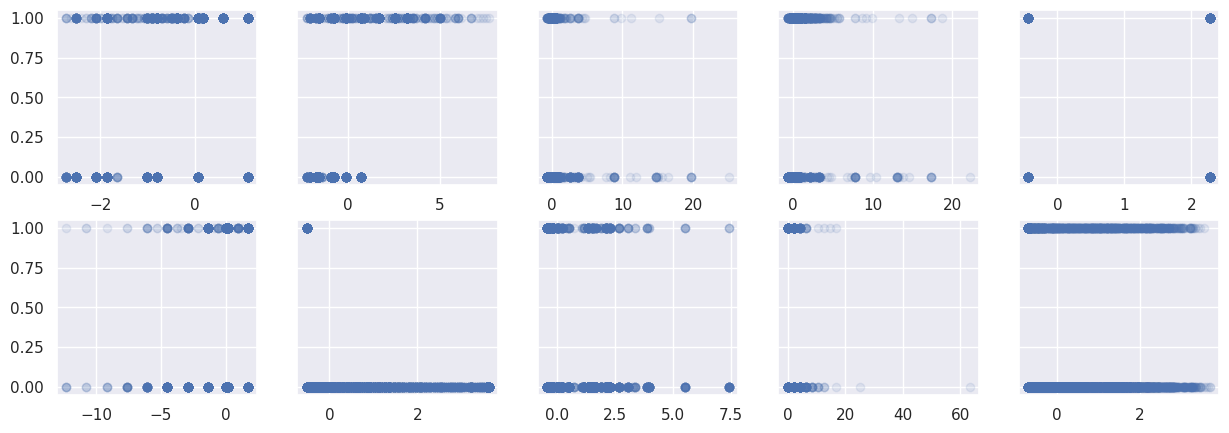

In [274]:
f, ax = plt.subplots(2, 5, sharey=True, figsize =(15,5))
ax[0,0].scatter(train_inputs[:,0],train_targets, alpha=0.1)
ax[0,1].scatter(train_inputs[:,1],train_targets, alpha=0.1)
ax[0,2].scatter(train_inputs[:,2],train_targets, alpha=0.1)
ax[0,3].scatter(train_inputs[:,3],train_targets, alpha=0.1)
ax[0,4].scatter(train_inputs[:,4],train_targets, alpha=0.1)

ax[1,0].scatter(train_inputs[:,5],train_targets, alpha=0.1)
ax[1,1].scatter(train_inputs[:,6],train_targets, alpha=0.1)
ax[1,2].scatter(train_inputs[:,7],train_targets, alpha=0.1)
ax[1,3].scatter(train_inputs[:,8],train_targets, alpha=0.1)
ax[1,4].scatter(train_inputs[:,9],train_targets, alpha=0.1)


In [275]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = train_inputs

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.shape[0]

In [276]:
vif

,VIF,Features
0,8.953812,11267
1,12.892705,11267
2,28.521396,11267
3,33.330468,11267
4,1.312431,11267
5,1.006803,11267
6,1.417693,11267
7,1.001745,11267
8,1.117602,11267
9,1.092278,11267


In [277]:
delete = [1,2,3]
filtered_inputs = np.delete(train_inputs, delete, axis=1)
filtered_inputs.shape

(11267, 7)

In [278]:
x = sm.add_constant(filtered_inputs)
logit = sm.Logit(train_targets, x)
result_reg = logit.fit()
result_reg.summary()

/usr/local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.292436
         Iterations: 35


/usr/local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                11267
Model:                          Logit   Df Residuals:                    11259
Method:                           MLE   Df Model:                            7
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.3316
Time:                        16:15:40   Log-Likelihood:                -3294.9
converged:                      False   LL-Null:                       -4929.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -178.3793   1492.223     -0.120      0.905   -3103.083    2746.325
x1            -0.1656      0.030     -5.577      0.000      -0.224      -0.107
x2             0.7740      0.053     14.501      0.000       0.669       0.879
x3             0.0577      0.042      1.373      0.170      -0.025       0.140
x4          -343.2836   2879.897     -0.119      0.905   -5987.778    5301.211
x5            -0.0606      0.032     -1.894      0.058      -0.123       0.002
x6             8.1184    223.982      0.036      0.971    -430.878     447.115
x7             0.6782      0.032     21.008      0.000       0.615       0.741
==============================================================================

Possibly complete quasi-separation: A fraction 0.42 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [279]:
x = sm.add_constant(train_inputs)
logit = sm.Logit(train_targets, x)
result_reg = logit.fit()
result_reg.summary()

         Current function value: 0.236942
         Iterations: 35


/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                11267
Model:                          Logit   Df Residuals:                    11256
Method:                           MLE   Df Model:                           10
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.4584
Time:                        16:15:40   Log-Likelihood:                -2669.6
converged:                      False   LL-Null:                       -4929.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -243.2740        nan        nan        nan         nan         nan
x1           -10.0110        nan        nan        nan         nan         nan
x2            12.8909        nan        nan        nan         nan         nan
x3           -23.3373   7.48e+05  -3.12e-05      1.000   -1.47e+06    1.47e+06
x4            26.3991   8.43e+05   3.13e-05      1.000   -1.65e+06    1.65e+06
x5             0.8091      0.056     14.469      0.000       0.699       0.919
x6             0.0426      0.047      0.901      0.367      -0.050       0.135
x7          -475.2964   5.23e+04     -0.009      0.993   -1.03e+05    1.02e+05
x8            -0.0611      0.036     -1.679      0.093      -0.132       0.010
x9            10.7754   3654.090      0.003      0.998   -7151.109    7172.660
x10            0.6539      0.035     18.503      0.000       0.585       0.723
==============================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [280]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [281]:
confusion_matrix(x, train_targets, result_reg)

(array([[9315.,  164.],
        [ 960.,  828.]]),
 0.9002396378805361)

In [282]:
xv = sm.add_constant(validation_inputs)
confusion_matrix(xv, validation_targets, result_reg)

(array([[1168.,   15.],
        [ 119.,  106.]]),
 0.9048295454545454)

In [283]:
xs = sm.add_constant(test_inputs)
confusion_matrix(xs, test_targets, result_reg)

(array([[1165.,   20.],
        [ 124.,  100.]]),
 0.8977998580553584)